
installation of keras et tensorflow's version required for the good of innvestigate



In [ ]:
!pip install keras==2.2.4
!pip install tensorflow==1.12
!pip install mnist
!pip install innvestigate

     |████████████████████████████████| 317kB 4.7MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 83.1MB 64kB/s 
     |████████████████████████████████| 3.1MB 51.5MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 102kB 4.1MB/s 


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import innvestigate
import innvestigate.utils
import cv2
import keras
from keras.preprocessing import image
from keras.utils import np_utils
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import cv2
import time
from skimage.metrics import structural_similarity as ssim


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [ ]:
#load mnist data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 16
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(num_filters,filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(20,activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
  validation_data=(test_images, to_categorical(test_labels)),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.3073 - acc: 0.9100 - val_loss: 0.1044 - val_acc: 0.9683
Epoch 2/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.1000 - acc: 0.9702 - val_loss: 0.0657 - val_acc: 0.9790
Epoch 3/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0748 - acc: 0.9770 - val_loss: 0.0612 - val_acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.0605 - acc: 0.9820 - val_loss: 0.0517 - val_acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0544 - val_acc: 0.9832
Epoch 6/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0475 - val_acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
model.save_weights('cnn.h5')
#model.load_weights('cnn.h5')

In [ ]:
def reset_weights(model,x_drive):


  L_maps=[]
  session = keras.backend.get_session()

  for layer in model.layers: 

    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session=session)
      analyzer = innvestigate.create_analyzer("deep_taylor", model)
      a = analyzer.analyze(x_drive)
      print(layer.name)
      L_maps.append(a)
  return L_maps

In [ ]:
train_images[0].shape


(28, 28, 1)

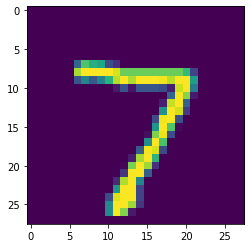

In [ ]:
img=test_images[0]
plt.imshow(img.reshape(28,28))


#choose the first image in the test set to apply the explainability methods 


In [ ]:
x_drive1 = image.img_to_array(test_images[0])
x_drive1 = np.expand_dims(x_drive1, axis=0)
x_drive1.shape

(1, 28, 28, 1)

In [ ]:
#drop the softmax activation function
model_softmax = innvestigate.utils.model_wo_softmax(model)


In [ ]:
layer_names=[layer.name for layer in model_softmax.layers]
print(layer_names)
print(len(layer_names))

['conv2d_1_input', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten_1', 'dense_1', 'dense_3']
8


In [ ]:
for i in range(len(layer_names),0,-1):
  print(layer_names[i-1])

dense_5
dense_3
flatten_2
max_pooling2d_4
conv2d_4
max_pooling2d_3
conv2d_3
conv2d_3_input


In [ ]:
#randomly permute the layers !
random_list=np.random.permutation(range(0,len(layer_names),1))
print(random_list)

[0 2 6 3 4 5 1 7]


In [ ]:
#function for cascading randomization
def cascading_random(model,x_drive,layer_names,method):

  L_names=[]
  L_maps=[]
  session = keras.backend.get_session()
  model.load_weights('cnn.h5')
  for i in range(len(layer_names),0,-1):
    layer=model.get_layer(layer_names[i-1]) 

    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session=session)
      analyzer = innvestigate.create_analyzer(method, model)
      a = analyzer.analyze(x_drive)
      L_maps.append(a)
      L_names.append(layer_names[i-1])
  return L_maps,L_names

In [ ]:
#function for independent randomization
def indep_random(model,x_drive,layer_names,random_list,method):

  L_names=[]
  L_maps=[]
  session = keras.backend.get_session()

  for i in range(len(random_list)):
    model.load_weights('cnn.h5')
    layer=model.get_layer(layer_names[random_list[i]]) 
    
    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session=session)
      analyzer = innvestigate.create_analyzer(method, model)
      a = analyzer.analyze(x_drive)
      L_maps.append(a)
      L_names.append(layer_names[random_list[i]])
  return L_maps,L_names

In [ ]:
# Methods we use and some properties.
methods = ["input","gradient","smoothgrad" ,"deconvnet","guided_backprop","deep_taylor","input_t_gradient",
"integrated_gradients","lrp.z","lrp.epsilon","lrp.sequential_preset_a_flat","lrp.sequential_preset_b_flat"]

In [ ]:
# Create analyzers.
analyzers_cas = []
names_cas=[]
analyzers_data=[]
names_data=[]
for method in methods:
    try:
      print(method)
      map_c,name_c = cascading_random(model_softmax,x_drive1,layer_names,method)               # apply the randomization function to every method
      map_r,name_r=indep_random(model_softmax,x_drive1,layer_names,random_list,method)

    except innvestigate.NotAnalyzeableModelException:
        # Not all methods work with all models.
        analyzer = None
    analyzers_cas.append(map_c)
    analyzers_data.append(map_r)
    names_cas.append(name_c)
    names_data.append(name_r)

input
gradient
smoothgrad
deconvnet
guided_backprop
deep_taylor
input_t_gradient
integrated_gradients
lrp.z
lrp.epsilon
lrp.sequential_preset_a_flat
lrp.sequential_preset_b_flat


In [ ]:
#all the analyzers of the innvestigate package
innvestigate.analyzer.analyzers

{'deconvnet': innvestigate.analyzer.gradient_based.Deconvnet,
 'deep_lift.wrapper': innvestigate.analyzer.deeplift.DeepLIFTWrapper,
 'deep_taylor': innvestigate.analyzer.deeptaylor.DeepTaylor,
 'deep_taylor.bounded': innvestigate.analyzer.deeptaylor.BoundedDeepTaylor,
 'gradient': innvestigate.analyzer.gradient_based.Gradient,
 'gradient.baseline': innvestigate.analyzer.gradient_based.BaselineGradient,
 'guided_backprop': innvestigate.analyzer.gradient_based.GuidedBackprop,
 'input': innvestigate.analyzer.misc.Input,
 'input_t_gradient': innvestigate.analyzer.gradient_based.InputTimesGradient,
 'integrated_gradients': innvestigate.analyzer.gradient_based.IntegratedGradients,
 'lrp': innvestigate.analyzer.relevance_based.relevance_analyzer.LRP,
 'lrp.alpha_1_beta_0': innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0,
 'lrp.alpha_1_beta_0_IB': innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0IgnoreBias,
 'lrp.alpha_2_beta_1': innvestigate.analy

In [ ]:
analyzers_data=np.asanyarray(analyzers_data)
analyzers_cas=np.asanyarray(analyzers_cas)
#analyzers_cas.shape
analyzers_data.shape


(12, 4, 1, 28, 28, 1)

In [ ]:
names_data

[['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3'],
 ['dense_3', 'conv2d_4', 'dense_5', 'conv2d_3']]

## cascading grid visualization !

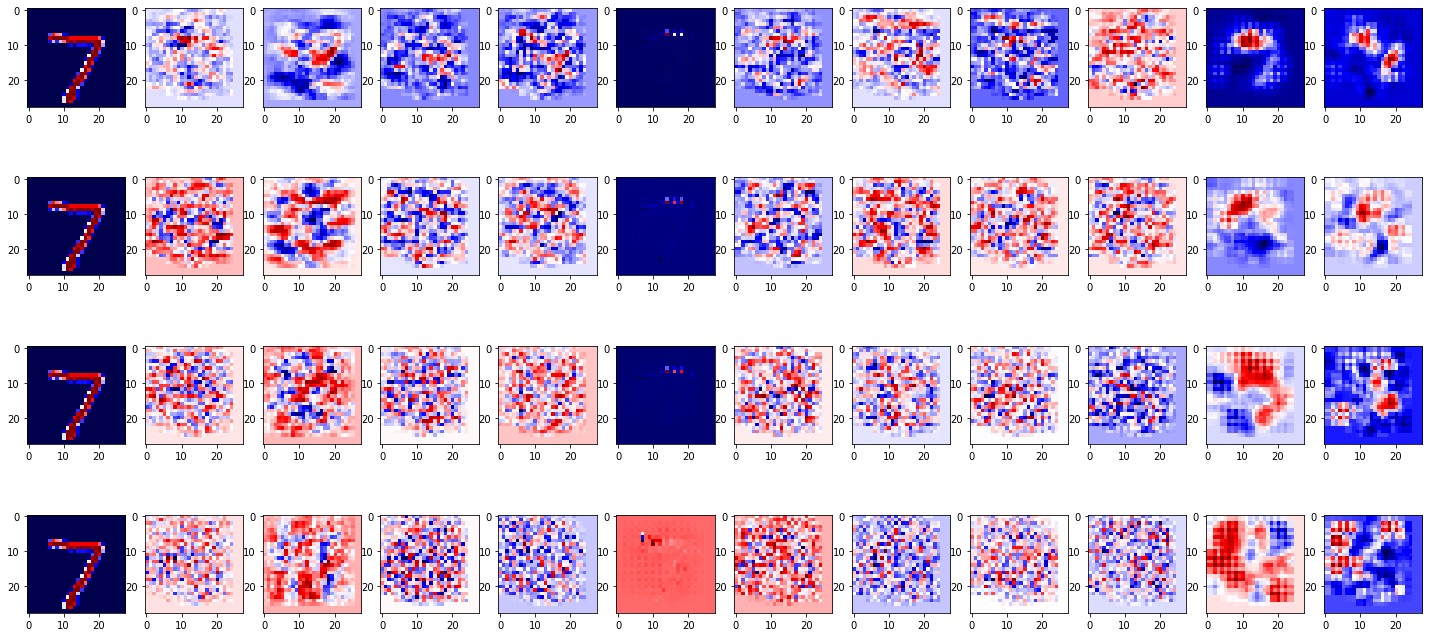

In [ ]:
fig = plt.figure(figsize=(25,15))

for j in range(12):
  for i in range(4):
    (plt.subplot2grid((5,12),(i,j))).imshow(analyzers_cas[j,i].squeeze(),cmap="seismic",interpolation='nearest')



## independent grid visualization !

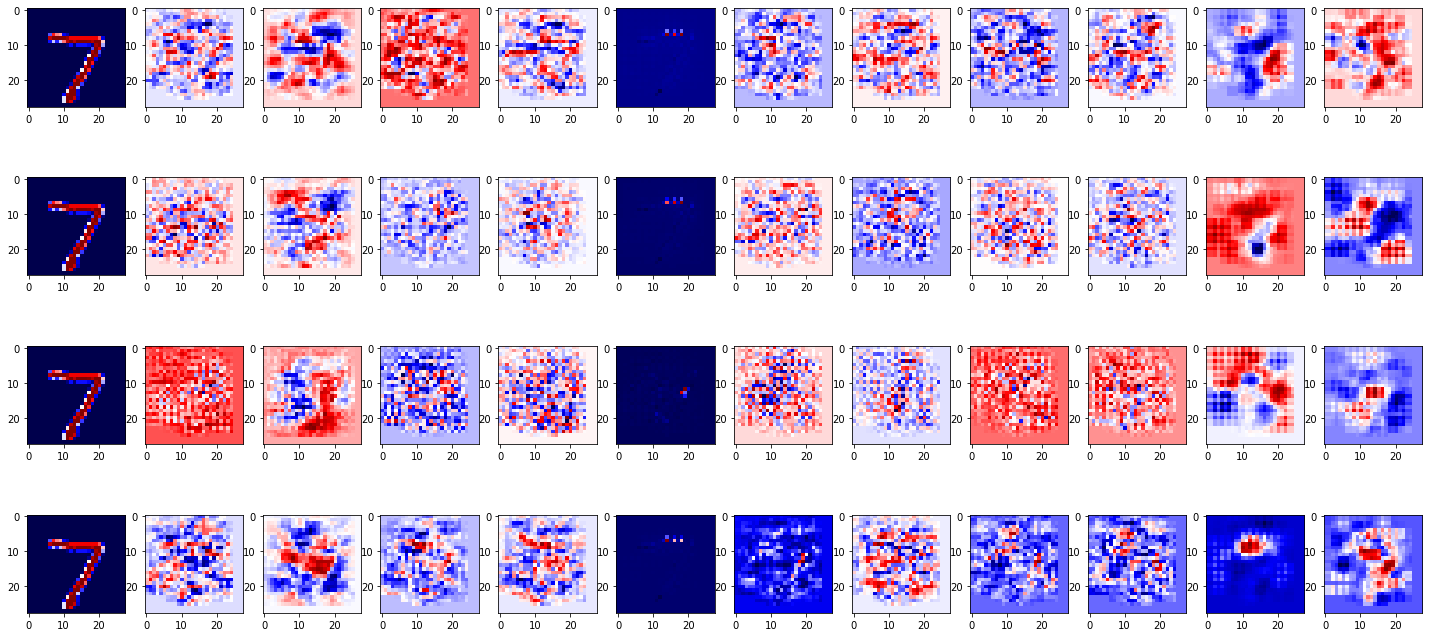

In [ ]:
fig = plt.figure(figsize=(25,15))

for j in range(12):
  for i in range(4):

    (plt.subplot2grid((5,12),(i,j))).imshow(analyzers_data[j,i].squeeze(),cmap="seismic",interpolation='nearest')

In [ ]:
# function for calculating the spearmen correlation rank  
def abs_rank(original, sailency):
  rank=stats.spearmanr(np.abs(original.flatten()),np.abs(sailency.flatten()))
  return rank

def Noabs_rank(original, sailency):
  rank=stats.spearmanr(original.flatten(),sailency.flatten())
  return rank

In [ ]:
##SSIM 
def ssim_coeff(original,sailency):
  #image need to be grayscale !
  #original=cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  #sailency=cv2.cvtColor(sailency, cv2.COLOR_BGR2GRAY)
  return ssim(original,sailency,data_range=sailency.max()-sailency.min())

# applying the metrics to every saliency map of every method 

In [ ]:
absrankCascade=[]
for i in range(12):


  absrankCascade.append([abs_rank(test_images[0].squeeze(),sail) for sail in analyzers_cas[i].squeeze()])



In [ ]:
NoabsrankCascade=[]
for i in range(12):
  

  NoabsrankCascade.append([Noabs_rank(test_images[0].squeeze(),sail) for sail in analyzers_cas[i].squeeze()])

In [ ]:
absrankRandom=[]
for i in range(12):
  

  absrankRandom.append([abs_rank(test_images[0].squeeze(),sail) for sail in analyzers_data[i].squeeze()])

In [ ]:
NoabsrankRandom=[]
for i in range(12):
  

  NoabsrankRandom.append([Noabs_rank(test_images[0].squeeze(),sail) for sail in analyzers_data[i].squeeze()])

In [ ]:
SSIM_R=[]
for i in range(12):
  SSIM_R.append([ssim_coeff(test_images[0].squeeze(),sail) for sail in analyzers_data[i].squeeze()])

In [ ]:
SSIM_C=[]
for i in range(12):
  SSIM_C.append([ssim_coeff(test_images[0].squeeze(),sail) for sail in analyzers_cas[i].squeeze()])

In [ ]:
corrCascadeAbs=np.asarray(absrankCascade)
corrCascade=np.asarray(NoabsrankCascade)
corrRandomAbs=np.asarray(absrankRandom)
corrRandom=np.asarray(NoabsrankRandom)
SSIMR=np.asanyarray(SSIM_R)
SSIMC=np.asarray(SSIM_C)
SSIMC.shape

(12, 4)

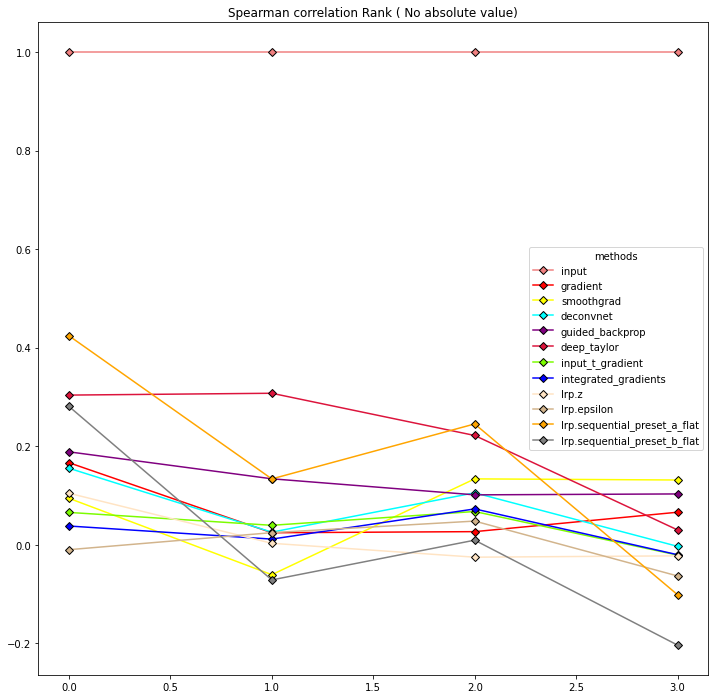

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrCascade[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrCascade[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrCascade[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrCascade[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrCascade[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrCascade[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrCascade[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrCascade[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrCascade[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrCascade[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrCascade[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrCascade[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank ( No absolute value)')
plt.show()


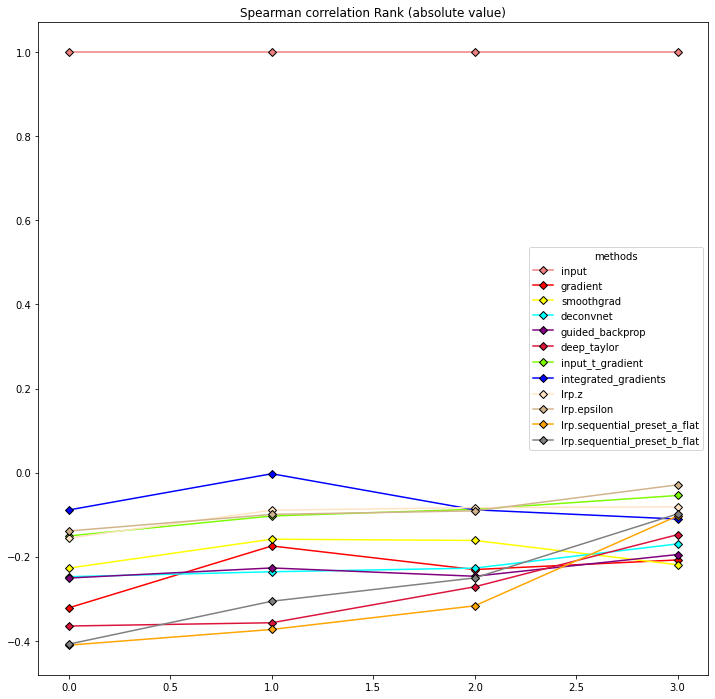

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrCascadeAbs[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrCascadeAbs[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrCascadeAbs[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrCascadeAbs[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrCascadeAbs[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrCascadeAbs[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrCascadeAbs[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrCascadeAbs[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrCascadeAbs[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrCascadeAbs[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrCascadeAbs[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrCascadeAbs[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank (absolute value)')
plt.show()

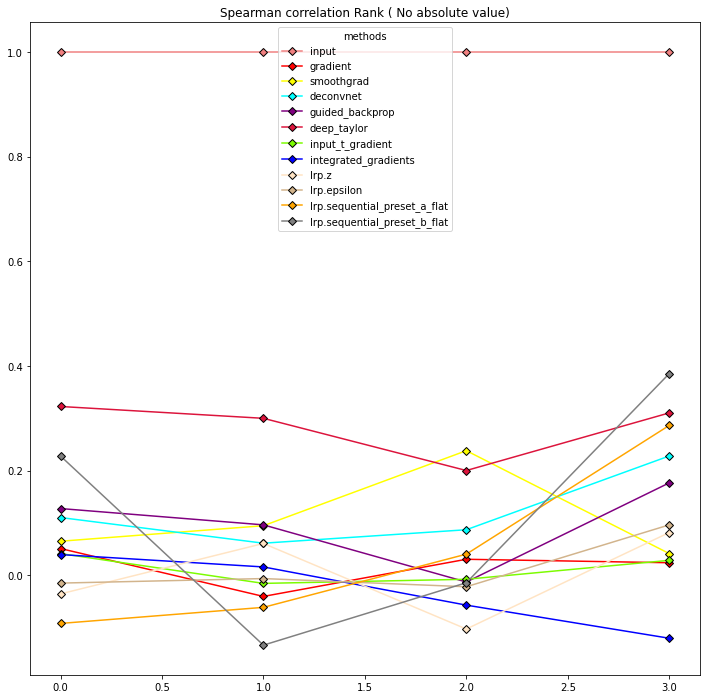

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrRandom[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrRandom[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrRandom[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrRandom[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrRandom[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrRandom[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrRandom[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrRandom[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrRandom[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrRandom[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrRandom[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrRandom[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank ( No absolute value)')
plt.show()

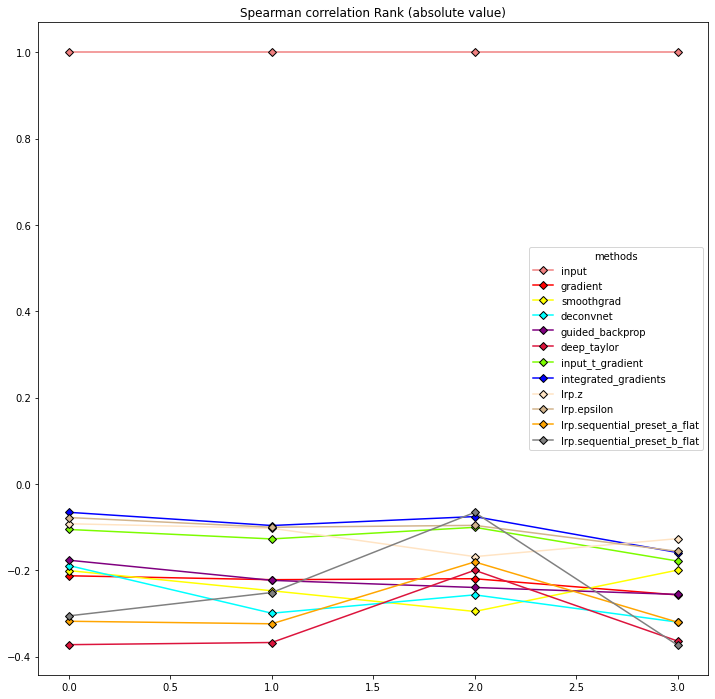

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrRandomAbs[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrRandomAbs[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrRandomAbs[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrRandomAbs[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrRandomAbs[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrRandomAbs[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrRandomAbs[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrRandomAbs[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrRandomAbs[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrRandomAbs[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrRandomAbs[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrRandomAbs[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank (absolute value)')
plt.show()

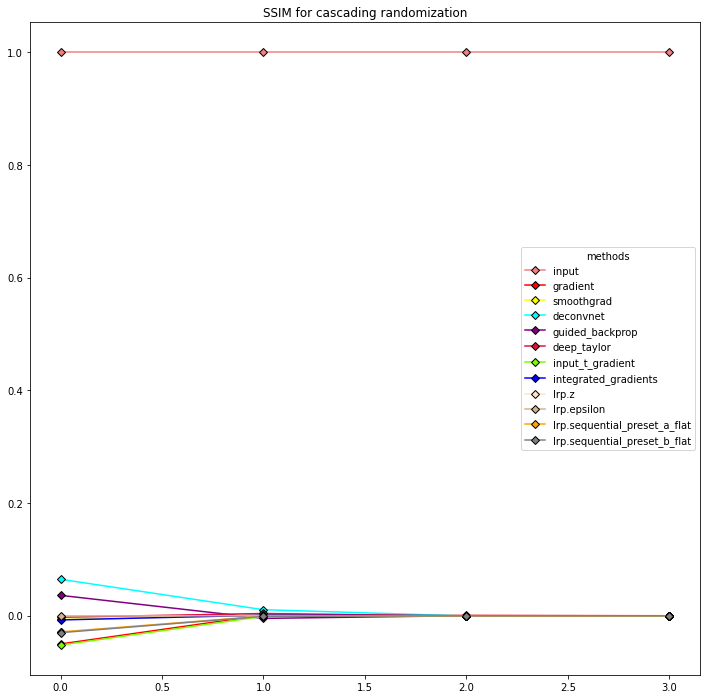

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(SSIMC[0,:], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(SSIMC[1,:], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(SSIMC[2,:], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(SSIMC[3,:], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(SSIMC[4,:], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(SSIMC[5,:], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(SSIMC[6,:], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(SSIMC[7,:], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(SSIMC[8,:], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(SSIMC[9,:], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(SSIMC[10,:], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(SSIMC[11,:], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('SSIM for cascading randomization')
plt.show()

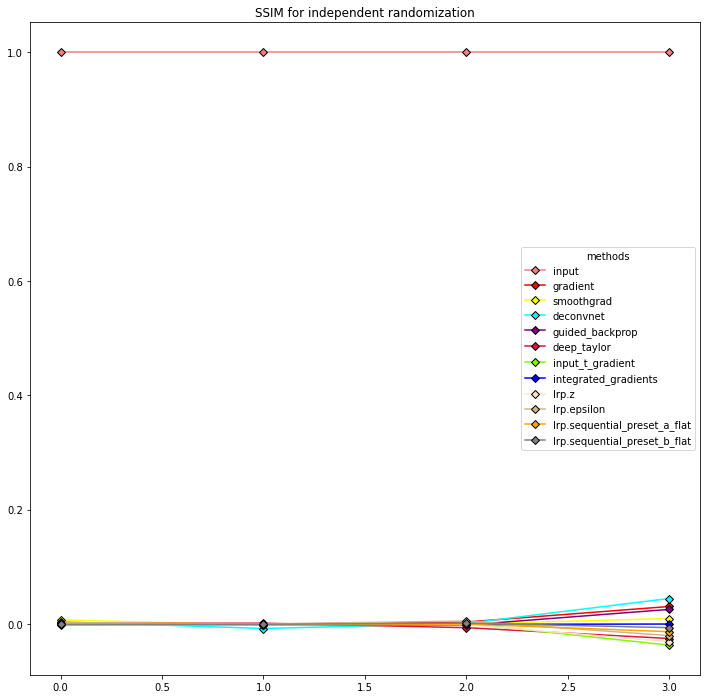

In [ ]:
plt.figure(figsize=(12,12))
a1=plt.plot(SSIMR[0,:], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(SSIMR[1,:], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(SSIMR[2,:], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(SSIMR[3,:], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(SSIMR[4,:], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(SSIMR[5,:], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(SSIMR[6,:], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(SSIMR[7,:], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(SSIMR[8,:], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(SSIMR[9,:], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(SSIMR[10,:], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(SSIMR[11,:], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('SSIM for independent randomization')
plt.show()